In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import random

def liniaN(x1, y1, x2, y2, rysowac=False, kolor_linii=[0, 0, 0]):
    assert isinstance(kolor_linii, list)
    assert x1 < 100
    assert x2 < 100
    assert y1 < 100
    assert y2 < 100
    
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    data = np.zeros((100, 100, 3), dtype=np.uint8)
    data.fill(255)
    
    delta_y = (y2 - y1)
    delta_x = (x2 - x1)
    
    m = delta_y / delta_x
    #print('m =', m)
    
    c = y1

    for x in range(x1, x2):
        y = math.floor(m * (x - x1) + c)
        data[x, y, 0] = kolor_linii[0]
        data[x, y, 1] = kolor_linii[1]
        data[x, y, 2] = kolor_linii[2]
    
    if rysowac is True:
        print('x0:', x1, 'y0:', y1, 'xk:', x2, 'yk:', y2)
        plt.imshow(data, interpolation='none', aspect=1)
        plt.show()
    
    return data


In [3]:
# liniaN(50, 50, 2, 2, True, [0, 206, 209])
# liniaN(2, 3, 50, 50, True)
# liniaN(30, 60, 80, 20, True)
# liniaN(50, 51, 30, 30, True)
# liniaN(15, 80, 60, 10, True)
# liniaN(1, 99, 20, 20, True)

In [4]:
def liniaBresenham(x0, y0, xk, yk, rysowac=False):
    assert x0 < 100
    assert xk < 100
    assert y0 < 100
    assert yk < 100
    
    dx = xk - x0
    dy = yk - y0
    
    #print("dx:", dx, "dy:", dy)
    data = np.zeros((100, 100, 3), dtype=np.uint8)
    data.fill(255)
    
    if abs(dx) > abs(dy):
        if x0 > xk:
            x0, xk = xk, x0
            y0, yk = yk, y0

        dx = xk - x0
        dy = yk - y0

        D = 2*dy - dx
        y = y0

        for x in range(x0, xk):
            data[y, x, 0] = 0
            data[y, x, 1] = 0
            data[y, x, 2] = 0

            if D > 0:
                y = y + np.sign(dy)
                D = D - 2*abs(dx)

            D = D + 2*abs(dy)

    else:
        if y0 > yk:
            xk, x0 = x0, xk
            yk, y0 = y0, yk
        
        dx = xk - x0
        dy = yk - y0


        D = 2*dx - dy
        x = x0

        for y in range(y0, yk):
            data[x, y, 0] = 0
            data[x, y, 1] = 0
            data[x, y, 2] = 0
            
            if D > 0:
                x = x + np.sign(dx)
                D = D - 2*abs(dy)

            D = D + 2*abs(dx)
    
    if rysowac is True:
        print('x0:', x0, 'y0:', y0, 'xk:', xk, 'yk:', yk)
        plt.imshow(data, interpolation='none', aspect=1)
        plt.show()
    
    return data


x0: 2 y0: 3 xk: 50 yk: 50


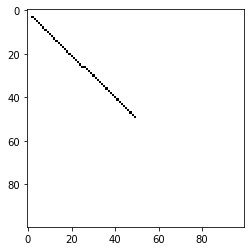

x0: 30 y0: 60 xk: 80 yk: 20


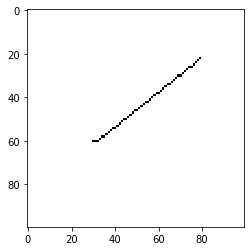

x0: 30 y0: 30 xk: 50 yk: 51


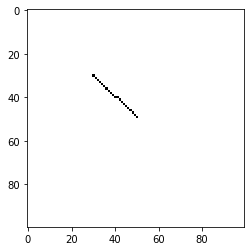

x0: 60 y0: 10 xk: 15 yk: 80


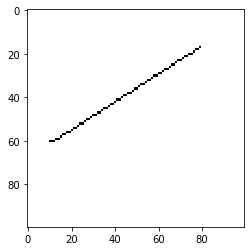

x0: 20 y0: 20 xk: 1 yk: 99


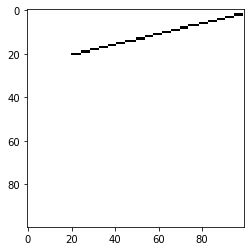

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
liniaBresenham(2, 3, 50, 50, True)
liniaBresenham(30, 60, 80, 20, True)
liniaBresenham(50, 51, 30, 30, True)
liniaBresenham(15, 80, 60, 10, True)
liniaBresenham(1, 99, 20, 20, True)


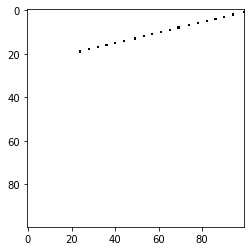

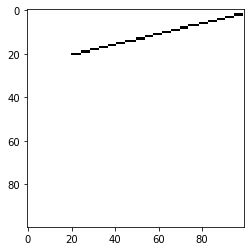

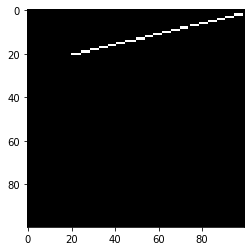

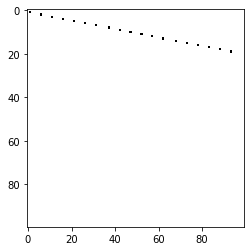

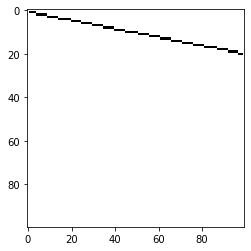

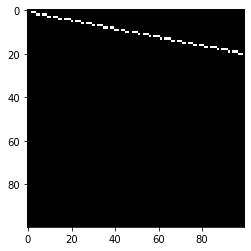

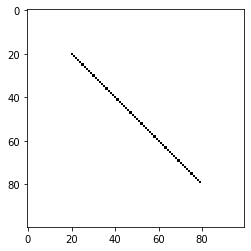

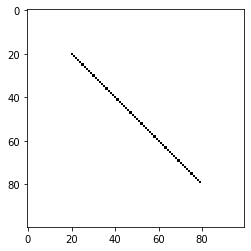

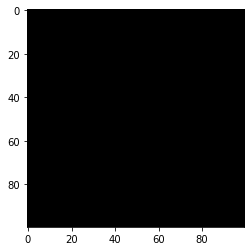

In [6]:
def rysuj(data1, data2):
    plt.imshow(data1, interpolation='none', aspect=1)
    plt.show()
    plt.imshow(data2, interpolation='none', aspect=1)
    plt.show()
    
    new_data = data1 - data2
    
    plt.imshow(new_data, interpolation='none', aspect=1)
    plt.show()
    
    return new_data
    

naive = liniaN(1, 99, 20, 20)
bresenham = liniaBresenham(1, 99, 20, 20)
wynik1 = rysuj(naive, bresenham)

naive2 = liniaN(1, 1, 20, 99)
bresenham2 = liniaBresenham(1, 1, 20, 99)
wynik2 = rysuj(naive2, bresenham2)

naive3 = liniaN(20, 20, 80, 80)
bresenham3 = liniaBresenham(20, 20, 80, 80)
wynik3 = rysuj(naive3, bresenham3)

In [7]:
wyniki_naive = []
wyniki_bresenham = []

for proba in range(50):
    x0, y0 = random.randint(0, 99), random.randint(0, 99)
    xk, yk = random.randint(0, 99), random.randint(0, 99)
    #print(x0, y0, xk, yk)
    
    try:
        start1 = time.time()
        liniaN(x0, y0, xk, yk)
        end1 = time.time()
        wynik_n = end1 - start1

        start2 = time.time()
        liniaBresenham(x0, y0, xk, yk)
        end2 = time.time()
        wynik_b = end2 - start2
        
    except ZeroDivisionError:
        continue
    
    wyniki_naive.append(wynik_n)
    wyniki_bresenham.append(wynik_b)
    
    #print(wynik1, wynik2)
    
print(np.mean(wyniki_naive))
print(np.mean(wyniki_bresenham))

3.985404968261719e-05
6.289482116699219e-05
